<a href="https://colab.research.google.com/github/danchaud-vincent/tensorflow-deep-learning/blob/main/exercices-solutions/03_Computer_Vision_and_Neural_Network_Exercices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03 - Computer Vision and Neural Networks Exercices

Take a dataset on kaggle (ex: cat vs dog) and Build a CNN image classifier using the techniques we've built in the course notebook. 

Find an ideal learning rate for a simple convolutional neural network model on the dataset.

In [20]:
# Importing the needed packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [21]:
from google.colab import drive

## 1. GET THE DATASET

I have download an image classifier dataset of cats and dogs from kaggle on the following webpage [cat and dog](https://www.kaggle.com/datasets/tongpython/cat-and-dog?select=test_set).

### 1.1 UNZIP the file

In [22]:
# read data from the google drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
# unzip the downloaded file
import zipfile
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/MACHINE_LEARNING/DATASET/cat_vs_dog.zip","r")
zip_ref.extractall()
zip_ref.close()

### 1.2. INSPECT THE DATASET

In [24]:
ls "cat_vs_dog"

test/  train/


We can see the folder of the dataset get a test and a train folder

In [25]:
ls "cat_vs_dog/test/"

cat/  dog/


In [26]:
ls "cat_vs_dog/test/dog/"

 dog.4001.jpg       dog.4251.jpg       dog.4503.jpg       dog.4754.jpg
 dog.4002.jpg       dog.4252.jpg       dog.4504.jpg       dog.4755.jpg
 dog.4003.jpg       dog.4253.jpg       dog.4505.jpg       dog.4756.jpg
 dog.4004.jpg       dog.4254.jpg       dog.4506.jpg       dog.4757.jpg
 dog.4005.jpg       dog.4255.jpg       dog.4507.jpg       dog.4758.jpg
 dog.4006.jpg       dog.4256.jpg       dog.4508.jpg       dog.4759.jpg
 dog.4007.jpg       dog.4257.jpg       dog.4509.jpg       dog.4760.jpg
 dog.4008.jpg       dog.4258.jpg       dog.4510.jpg       dog.4761.jpg
 dog.4009.jpg       dog.4259.jpg       dog.4511.jpg       dog.4762.jpg
 dog.4010.jpg       dog.4260.jpg       dog.4512.jpg       dog.4763.jpg
 dog.4011.jpg       dog.4261.jpg       dog.4513.jpg       dog.4764.jpg
 dog.4012.jpg       dog.4262.jpg       dog.4514.jpg       dog.4765.jpg
 dog.4013.jpg       dog.4263.jpg       dog.4515.jpg       dog.4766.jpg
 dog.4014.jpg       dog.4264.jpg       dog.4516.jpg       dog.4767.jpg
 dog.4

In [30]:
# walk through cat_vs_dog directory 
import os
for dirpath, dirnames, filenames in os.walk("cat_vs_dog"):
  print(f"{dirpath} has {len(dirnames)} folders and {len(filenames)} files")

cat_vs_dog has 2 folders and 0 files
cat_vs_dog/train has 2 folders and 0 files
cat_vs_dog/train/cat has 0 folders and 4001 files
cat_vs_dog/train/dog has 0 folders and 4006 files
cat_vs_dog/test has 2 folders and 0 files
cat_vs_dog/test/cat has 0 folders and 1012 files
cat_vs_dog/test/dog has 0 folders and 1013 files


In [36]:
# Get the class names
import pathlib

data_dir = pathlib.Path("cat_vs_dog/train")
class_names = sorted([item.name for item in data_dir.glob("*")])
class_names

['cat', 'dog']

### 1.3 Visualize the data

In [37]:
# libraries
import matplotlib.image as mpimg
import random

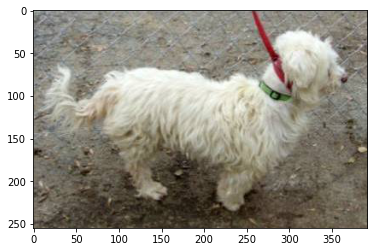

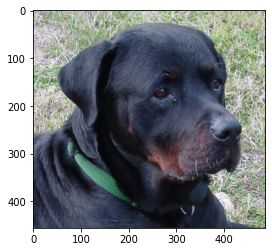

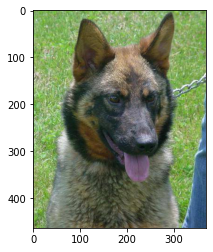

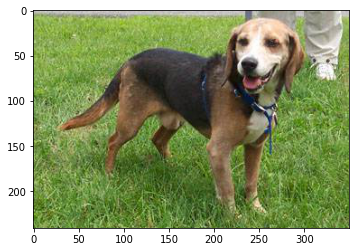

In [51]:
# plot some random images
dirname = "cat_vs_dog"
folder_name = "train"
class_name = "dog"

# select random images
random_images = random.sample(os.listdir(f"{dirname}/{folder_name}/{class_name}"),4)

for image in random_images:
 
  img = mpimg.imread(f"{dirname}/{folder_name}/{class_name}/{image}")
  plt.figure()
  plt.imshow(img)
  plt.show()

In [57]:
# build a function to visualize random image
def plot_random_images(target_dir, target_class, num_images):
  """
  Plot random images of a target class

  Arguments:
  - targer_dir (str): name of the directory 
  - target_class (str): name of the class of the images
  - num_images (int): number of images to plot
  """

  # create path 
  path = f"{target_dir}/{target_class}"

  # select random images
  random_images = random.sample(os.listdir(path),num_images)

  # plot the images
  for i, image in enumerate(random_images):

    # read the image
    img = mpimg.imread(path+"/"+image)

    # shape of the image
    shape_img = img.shape

    # create a figure
    plt.figure()
    plt.imshow(img)
    plt.title(f"Image {i} | Shape : {shape_img}")
    plt.show()


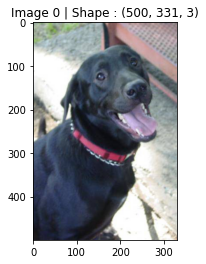

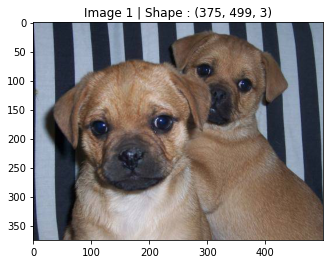

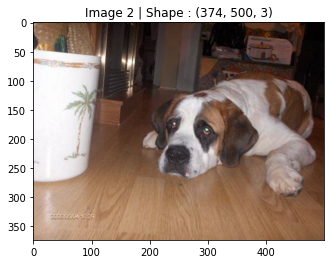

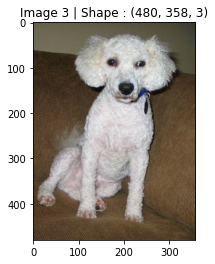

In [59]:
# visualize some images of dog
plot_random_images("cat_vs_dog/train","dog",4)

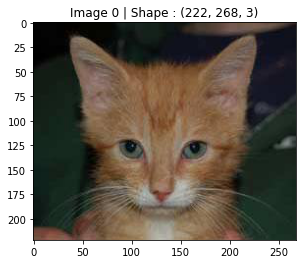

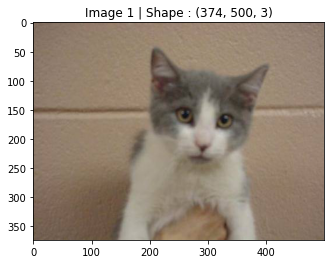

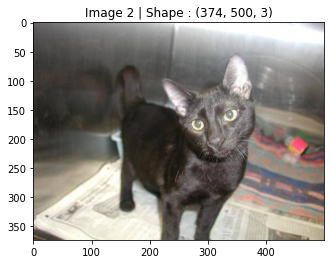

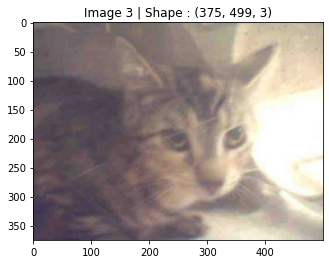

In [60]:
# visualize some images of cats
plot_random_images("cat_vs_dog/train","cat",4)

In [65]:
# Get max and min of an image
random_image = random.sample(os.listdir(f"cat_vs_dog/train/dog"),1)
img = mpimg.imread(f"cat_vs_dog/train/dog/{random_image[0]}")

print("Max of the image:", np.max(img))
print("Min of the image:", np.min(img))

Max of the image: 255
Min of the image: 0


# 2. Build a CNN classifier

In [66]:
# import tensorflow libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import MaxPool2D, Conv2D, Flatten, Dense

## 2.1 Model 1

### 2.1.1 Preprocess the data

In [67]:
# Define the directories paths
train_dir = "cat_vs_dog/train/"
test_dir = "cat_vs_dog/test/"

In [68]:
# Create train and test data generators (rescale the data)
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)